In [2]:

import matplotlib.pyplot as plt
import numpy as np
import math

# Q1

In [2]:
def part_a(A,T,n):
    #Generate a random bit stream and let the corresponding Binary PCM NRZ-L waveform
    #be represented by x(t). Sample x(t) with a sampling rate fs = 10/T to obtain
    #a sequence x(n) and add AWGN to give the sampled received waveform r(n). Using
    #the matched filter (or correlators) discussed in class, detect the message from the received
    #signal r(n), and compare with the original message bits to compute the bit error
    #probability PB
    fs = 10/T
    ts = 1/fs
    x = np.empty([n, int(T/ts)])
    for i in range(n):
        num = np.random.randint(2)
        if num == 0:
            num = -A
        else:
            num = A
        row = np.full((1, int(T/ts)), num)
        x[i] = row;
    
    y_axis = np.reshape(x,(n*int(T/ts)))
    x_axis = np.arange(0,n,ts/T)
    print(np.shape(x_axis))
    
    sigma = 1;
    awgn_sequence = sigma*(np.random.randn(int(n*T*fs)));
    print(np.shape(awgn_sequence))
    
    #plotting
    plt.figure()
    plt.plot(x_axis,y_axis)
    plt.title('NRZL Scheme')
    plt.show()
    
    transmitted_signal = np.add(y_axis,awgn_sequence)
    print(np.shape(transmitted_signal))
    plt.figure()
    plt.plot(x_axis,transmitted_signal)
    plt.title('Transmitted Signal')
    plt.show()
    
    #Matched Filter
    h = np.full((int(T/ts)), 2*A)
    
    #Recovered Signal
    received_signal = np.convolve(h,transmitted_signal)
    
    count=0
    recovered_sig = np.empty([n, int(T/ts)])
    for i in range(n):
        if(received_signal[int((i*T*fs) + (n/2))]>0):
            curr = A
        else:
            curr = -A
        if(abs(curr - y_axis[int((i*T*fs) + (n/2))]) > 0.00001):
            count=count+1;
        row = np.full((1, int(T/ts)), curr)
        recovered_sig[i] = row;
    recovered_sig = np.reshape(recovered_sig,(n*int(T/ts)))
    
    plt.figure
    plt.plot(x_axis,recovered_sig)
    plt.title('Reconstructed')
    plt.show()
    
    print('No of bits interpreted incorrectly:',count)

In [3]:
def part_b(T,n,A,experiments,standard_deviation):
    #Bit Error probability calculation for multiple iterations
    fs = 10/T
    ts = 1/fs
    #Matched Filter
    h = np.full((int(T/ts)), 2*A)
    count = 0;
    for i in range(experiments):
        x = np.empty([n, int(T*fs)])
        for i in range(n):
            num = np.random.randint(2)
            if num == 0:
                num = -A
            else:
                num = A
            row = np.full((1, int(T*fs)), num)
            x[i] = row;

        y_axis = np.reshape(x,int(n*T*fs))

        awgn_sequence = standard_deviation*(np.random.randn(int(n*T*fs)))
        transmitted_signal = np.add(y_axis,awgn_sequence)

        received_signal = np.convolve(h,transmitted_signal)
        for i in range(n):
            if(received_signal[int((i*T*fs) + (n/2))]>0):
                curr = A
            else:
                curr = -A
            if(abs(curr - y_axis[int((i*T*fs) + (n/2))]) > 0.00001):
                count=count+1;
    error_probability = count/(experiments*n)
    return error_probability

In [4]:
def part_c(A,T,n,experiments,standard_deviation):
    #Variance v/s bit error probability graph
    variance = np.arange(0,10,0.1)
    val = np.empty([variance.shape[0]])
    for j in range(variance.shape[0]):
        val[j] = part_b(T,n,A,experiments,math.sqrt(variance[j]))
    
    plt.figure
    plt.plot(variance,val)
    plt.title('Variance v/s bit error probability')
    plt.show()
    
    #Amplitude v/s bit error probability graph
    amplitude = np.arange(0,10,0.1)
    val = np.empty([amplitude.shape[0]])
    for j in range(amplitude.shape[0]):
        val[j] = part_b(T,n,amplitude[j],experiments,standard_deviation)
    
    plt.figure
    plt.plot(amplitude,val)
    plt.title('Amplitude v/s bit error probability')
    plt.show()
    
    #T v/s bit error probability graph
    T = np.arange(1,10,0.1)
    val = np.empty([T.shape[0]])
    for j in range(T.shape[0]):
        val[j] = part_b(T[j],n,A,experiments,standard_deviation)
    
    plt.figure
    plt.plot(T,val)
    plt.title('T v/s bit error probability')
    plt.show()

(160,)
(160,)


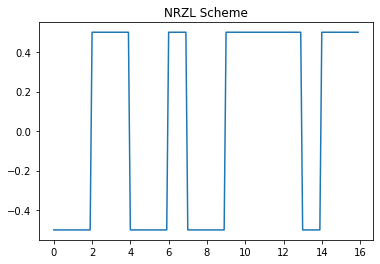

(160,)


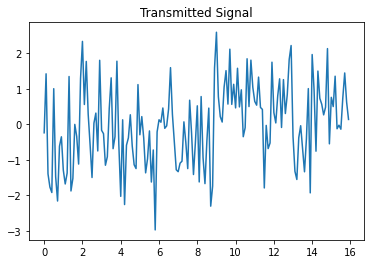

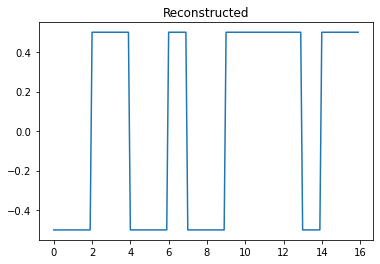

No of bits interpreted incorrectly: 0
The error probability (P_B) for 1000 iterations is: %d 0.0775625


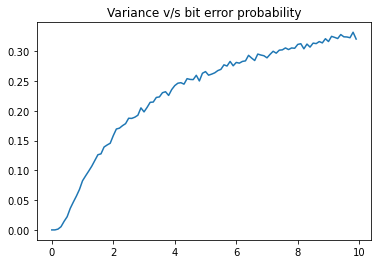

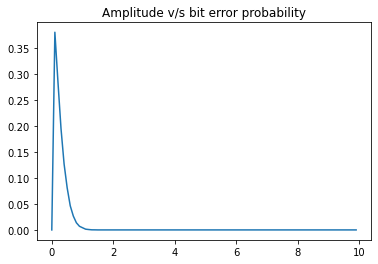

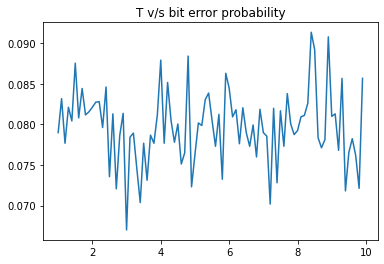

In [5]:
T=1
n=16
A = 0.5;
experiments = 1000;
standard_deviation = 1;
transmitted_signal = part_a(A,T,n)
ans = part_b(T,n,A,experiments, standard_deviation)
print("The error probability (P_B) for 1000 iterations is: %d",ans)
part_c(A,T,n,experiments, standard_deviation)

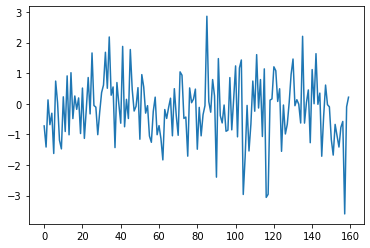

In [4]:
plt.plot(1*(np.random.randn(int(10*16))))